# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import citipy
# Import API key
# from api_keys import weather_api_key
weather_api_key = "fa0ded07eec8cf71985c020fd922399d"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# pprint(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [111]:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
query_url=f'{url}appid={weather_api_key}&units={units}&q='

cityName=[]         # list for city name
clouds=[]        # list for cloudines
country=[]         # list for country
date=[]         # list for date
humidity=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxTemperature=[]      # list for max temperature
windSpeed=[]         # list for wind speed

count = 1
print('Retrieved Data')
print('__________________________')
for city in cities:
        response=requests.get(query_url + city).json()

        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)

        try:                                                # Ignore errors in response.
            cityName.append(response['name'])
            clouds.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            maxTemperature.append(response['main']['temp_max'])
            windSpeed.append(response['wind']['speed'])
        except KeyError:

            print(city + ' city not found. Skipping this City') # In case one of the responses comes back with error "KeyError"
                                                            # which could be the city or one of the data points missing.
        count=count+1

Retrieved Data
__________________________
Processing Record 1 of 629 | teya
Processing Record 2 of 629 | richards bay
Processing Record 3 of 629 | kulhudhuffushi
Processing Record 4 of 629 | airai
Processing Record 5 of 629 | bojnurd
Processing Record 6 of 629 | vestmannaeyjar
Processing Record 7 of 629 | rikitea
Processing Record 8 of 629 | ko samui
Processing Record 9 of 629 | albany
Processing Record 10 of 629 | amderma
amderma city not found. Skipping this City
Processing Record 11 of 629 | gornopravdinsk
Processing Record 12 of 629 | ati
Processing Record 13 of 629 | suihua
Processing Record 14 of 629 | hilo
Processing Record 15 of 629 | medak
Processing Record 16 of 629 | taolanaro
taolanaro city not found. Skipping this City
Processing Record 17 of 629 | kasane
Processing Record 18 of 629 | nishihara
Processing Record 19 of 629 | mahebourg
Processing Record 20 of 629 | mataura
Processing Record 21 of 629 | ushuaia
Processing Record 22 of 629 | ngora
Processing Record 23 of 629 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [112]:
# Set up lists to hold response info:


weather_dict = {
    'City': cityName,
    'Country': country,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness (%)': clouds,
    'Humidity (%)': humidity,
    'Max Temp (F)': maxTemperature,
    'Wind Speed (mph)': windSpeed
}

weather_data=pd.DataFrame(weather_dict)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [113]:
# Test/clean data:
weather_data.isnull().sum()
weather_data.dropna()
print(weather_data.loc[weather_data["Humidity (%)"] > 100])
# Counts to see if over 500
weather_data.count()

weather_data.to_csv(output_data_file, index=False)



Empty DataFrame
Columns: [City, Country, Date, Lat, Lng, Cloudiness (%), Humidity (%), Max Temp (F), Wind Speed (mph)]
Index: []


In [114]:
#  Get the indices of cities that have humidity over 100%.


In [115]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [116]:
# Load csv file so querry does not need to run every time for the below plots:
clean_city_data = weather_data
clean_city_data.head()



,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Teya,RU,1617995802,60.3778,92.6267,97,97,24.89,2.06
1,Richards Bay,ZA,1617995802,-28.7830,32.0377,0,87,68.90,1.30
2,Kulhudhuffushi,MV,1617995803,6.6221,73.0700,0,75,82.31,5.44
3,Airai,TL,1617995728,-8.9266,125.4092,87,84,57.04,1.54
4,Bojnourd,IR,1617995803,37.4747,57.3290,0,31,60.80,6.91


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<ipython-input-117-001e340d678a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


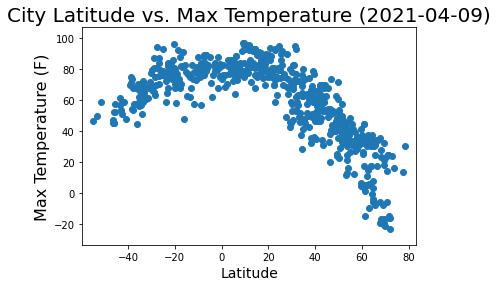

In [117]:
latx = clean_city_data["Lat"]
Tempy = clean_city_data["Max Temp (F)"]
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
# Set the limits of the y axis:
plt.ylim(min(clean_city_data['Max Temp (F)'])-10, max(clean_city_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)



plt.scatter(latx, Tempy)
plt.savefig('Resources/City Latitude vs. MaxTemp.png')


## Latitude vs. Humidity Plot

<ipython-input-118-87c553b749a5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


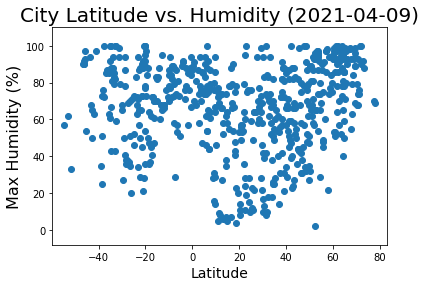

In [118]:
Humy = clean_city_data["Humidity (%)"]
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
# Set the limits of the y axis:
plt.ylim(min(clean_city_data['Humidity (%)'])-10, max(clean_city_data['Humidity (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)



plt.scatter(latx, Humy)
plt.savefig('Resources/City Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

<ipython-input-119-d6ba6eb83438>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Clouds ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


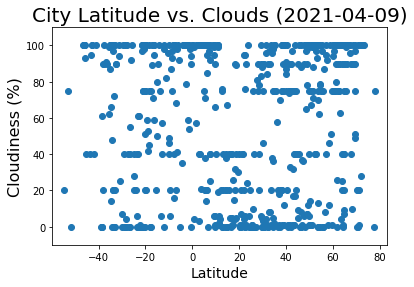

In [119]:
cloudsy = clean_city_data["Cloudiness (%)"]
plt.title('City Latitude vs. Clouds ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
# Set the limits of the y axis:
plt.ylim(min(clean_city_data['Cloudiness (%)'])-10, max(clean_city_data['Cloudiness (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)


plt.savefig('Resources/City Latitude vs. Clouds.png')

plt.scatter(latx, clouds)



## Latitude vs. Wind Speed Plot

<ipython-input-120-a0b321d873cd>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind speeds ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


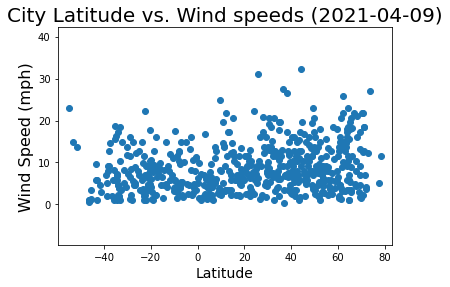

In [120]:
speedy = clean_city_data["Wind Speed (mph)"]
plt.title('City Latitude vs. Wind speeds ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
# Set the limits of the y axis:
plt.ylim(min(clean_city_data['Wind Speed (mph)'])-10, max(clean_city_data['Wind Speed (mph)'])+10)

# Set the limits of the x axis:
plt.xlim(min(clean_city_data['Lat'])-5, max(clean_city_data['Lat'])+5)




plt.scatter(latx, speedy)
plt.savefig('Resources/City Latitude vs. Windspeed.png')

## Linear Regression

In [121]:
weather_data_north = clean_city_data[clean_city_data['Lat'] >= 0]

weather_data_south = clean_city_data[clean_city_data['Lat'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.75


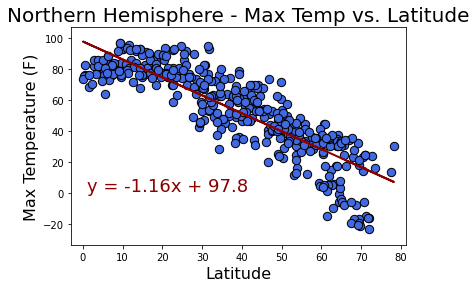

In [122]:
latx_north = weather_data_north['Lat']
tempy_north = weather_data_north['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_north, tempy_north)

# Get regression values:
regress_values = latx_north * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_north,tempy_north, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_north,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(weather_data_north['Max Temp (F)'])-10, max(weather_data_north['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_data_north['Lat'])+3)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

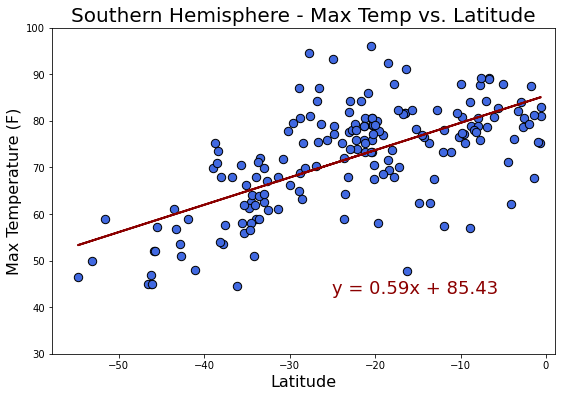

In [123]:
plt.figure(figsize=(9,6))
xlat_south = weather_data_south['Lat']
ytemp_south = weather_data_south['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(xlat_south, ytemp_south)

# Get regression values:
regress_values = xlat_south * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(xlat_south,ytemp_south, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(xlat_south,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(weather_data_south['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1


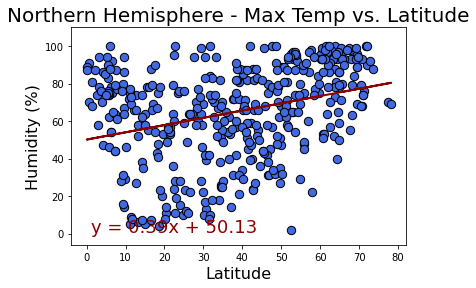

In [124]:
latx_north = weather_data_north['Lat']
humidy_north = weather_data_north['Humidity (%)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_north, humidy_north)

# Get regression values:
regress_values = latx_north * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_north,humidy_north, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_north,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Humid_North.png')

# Show plot:
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


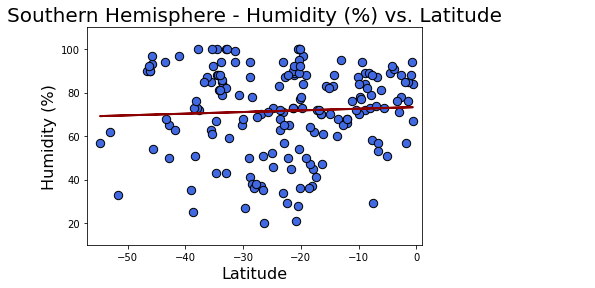

In [125]:
latx_south = weather_data_south['Lat']
humidy_south = weather_data_south['Humidity (%)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_south, humidy_south)

# Get regression values:
regress_values = latx_south * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_south,humidy_south, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_south,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Humid_South.png')

# Show plot:
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


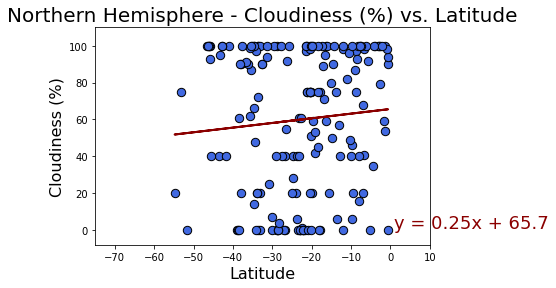

In [135]:
latx_north = weather_data_south['Lat']
cloudy_north = weather_data_south['Cloudiness (%)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_north, cloudy_north)

# Get regression values:
regress_values = latx_north * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_north,cloudy_north, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_north,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-75, 10)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01


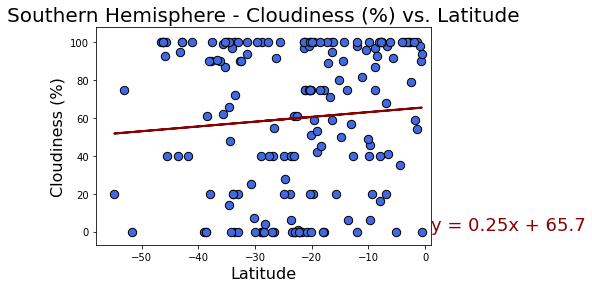

In [127]:
latx_south = weather_data_south['Lat']
cloudy_south = weather_data_south['Cloudiness (%)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_south, cloudy_south)

# Get regression values:
regress_values = latx_south * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_south,cloudy_south, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_south,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)


# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04


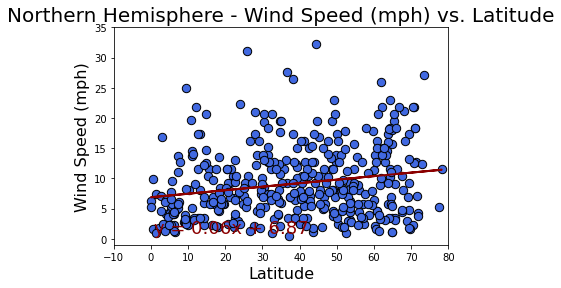

In [132]:
latx_north = weather_data_north['Lat']
windy_north = weather_data_north['Wind Speed (mph)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_north, windy_north)

# Get regression values:
regress_values = latx_north * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_north,windy_north, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_north,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 35)

# Set the limits of the x axis:
plt.xlim(-10, 80)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Windiness_North.png')

# Show plot:
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [1]:
latx_south = weather_data_south['Lat']
windy_south = weather_data_south['Wind Speed (mph)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(latx_south, windy_south)

# Get regression values:
regress_values = latx_south * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(latx_south,windy_south, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(latx_south,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('Resources/City Latitude vs. Windiness_South.png')

# Show plot:
plt.show()


NameError: name 'weather_data_south' is not defined